# Project: Data Analysis

In this project, I want to find the most frequent topics from unstructured complaint texts using Natural Language Processing (NLP) techniques. I selected the dataset “Air France Reviews” from Kaggle, which includes unstructured customer feedback about airline services. These reviews often express detailed complaints and opinions about flight delays, food, staff, and comfort, making them ideal for identifying key topics through NLP.

## Text Preprocessing
* Removing punctuation
* Lowercasing
* Eliminating Stopwords
* Lemmatization

## Vectorization Techniques
* TF-IDF via Sklearn
* BERT

## Topic Extraction
* LDA
* BERTopic

## Notebook Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

## Data Loading

In [2]:
dataset = pd.read_csv("/kaggle/input/air-france-reviews-dataset/airfrance_tripadvisor_reviews.csv")
dataset.head()

,rating,title,text,publishedDate
0,1,WORST AIRLINE,I travel a lot - and I travel often. Last week...,2024-11-13
1,1,Terrible experience with Airfrance,"This review is regarding flight AF185, we book...",2024-11-13
2,1,Extremely Disappointing Experience with Air Fr...,I recently flew with Air France on flight #185...,2024-11-12
3,1,Horrible,Wow!!! What a horrible experience!! I've alway...,2024-11-11
4,1,The Worst Flight Experience I’ve Ever Had,I spent a fantastic 10-day vacation in Hong Ko...,2024-11-11


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rating         2560 non-null   int64 
 1   title          2560 non-null   object
 2   text           2560 non-null   object
 3   publishedDate  2560 non-null   object
dtypes: int64(1), object(3)
memory usage: 80.1+ KB


In [4]:
dataset.duplicated().sum()

0

In [5]:
dataset.shape

(2560, 4)

## Data Visualization

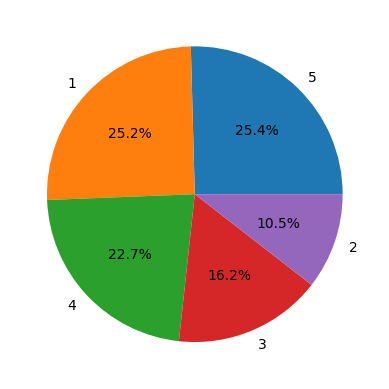

In [6]:
rating = dataset['rating'].value_counts()
labels = rating.keys()
plt.pie(rating, labels=labels, autopct='%1.1f%%')
plt.show()

## Data Cleaning

In [7]:
def preprocess_text(text: str, stopwords=set(stopwords.words('english')), wnl=WordNetLemmatizer()):
    
    """
    Preprocesses the input text by tokenizing, removing stopwords and punctuation, and lemmatizing the words.
    
    Args:
        text (str): The input text to be preprocessed.
        stopwords (set, optional): A set of stopwords to be removed from the text. Defaults to nltk's English stopwords.
        wnl (WordNetLemmatizer, optional): An instance of WordNetLemmatizer for lemmatizing words. Defaults to an instance of WordNetLemmatizer.
        
    Returns:
        list or str: The preprocessed text. 
    """
    
    # Tokenising
    words = word_tokenize(text.lower())
    
    # Removing Stopwords & Punctuation
    filtered_text = [word for word in words if word not in stopwords and word.isalpha()]
    
    # Lemmatization
    preprocessed_text = [wnl.lemmatize(word) for word in filtered_text]
    
    return preprocessed_text

In [8]:
dataset['text'] = dataset['text'].apply(preprocess_text)
dataset.head()

,rating,title,text,publishedDate
0,1,WORST AIRLINE,"[travel, lot, travel, often, last, week, flew,...",2024-11-13
1,1,Terrible experience with Airfrance,"[review, regarding, flight, booked, economy, f...",2024-11-13
2,1,Extremely Disappointing Experience with Air Fr...,"[recently, flew, air, france, flight, hong, ko...",2024-11-12
3,1,Horrible,"[wow, horrible, experience, always, flown, por...",2024-11-11
4,1,The Worst Flight Experience I’ve Ever Had,"[spent, fantastic, vacation, hong, kong, famil...",2024-11-11


In [9]:
dataset.drop(['title', 'publishedDate'], axis=1, inplace=True)
dataset.head()

,rating,text
0,1,"[travel, lot, travel, often, last, week, flew,..."
1,1,"[review, regarding, flight, booked, economy, f..."
2,1,"[recently, flew, air, france, flight, hong, ko..."
3,1,"[wow, horrible, experience, always, flown, por..."
4,1,"[spent, fantastic, vacation, hong, kong, famil..."


## Text Vectorization

### Option 1: TF-IDF via Sklearn

In [10]:
dataset['cleaned_text'] = dataset['text'].apply(" ".join)
documents = [item for item in dataset['cleaned_text']]

In [11]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)
X.shape

(2560, 8998)

In [12]:
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.tail()

,aa,aaadvantage,aayush,abandon,abandoned,abbreviated,abbreviation,abc,abd,aberdeen,...,zipped,zipping,zone,zoned,zoo,zue,zurich,zzzz,zürich,în
2555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
tfidf_df = tfidf_df.stack().reset_index()
tfidf_df.head()

,level_0,level_1,0
0,0,aa,0.0
1,0,aaadvantage,0.0
2,0,aayush,0.0
3,0,abandon,0.0
4,0,abandoned,0.0


In [14]:
tfidf_df = tfidf_df.rename(columns={0:'tfidf','level_1': 'term', 'level_2': 'term', 'level_0': 'document_number'})
tfidf_df.head()

,document_number,term,tfidf
0,0,aa,0.0
1,0,aaadvantage,0.0
2,0,aayush,0.0
3,0,abandon,0.0
4,0,abandoned,0.0


In [15]:
tfidf_df.shape

(23034880, 3)

In [16]:
tfidf_df.describe()

,document_number,tfidf
count,2.303488e+07,2.303488e+07
mean,1.279500e+03,6.336116e-04
std,7.390083e+02,1.052304e-02
min,0.000000e+00,0.000000e+00
25%,6.397500e+02,0.000000e+00
50%,1.279500e+03,0.000000e+00
75%,1.919250e+03,0.000000e+00
max,2.559000e+03,8.290709e-01


In [17]:
vocabulary = vectorizer.vocabulary_
len(vocabulary)

8998

## Option 2: BERT